#**Lab 5 - CNN Nature**

In [ ]:
from google.colab import drive

drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
# First path in below cell - Your Google Drive file location where you want to unzip
# Second path in below cell - Path where you want to extract the zip file in Google Drive
# !unzip '/drive/MyDrive/Colab Notebooks/DL/Data/nature/nature.zip' -d '/drive/MyDrive/Colab Notebooks/DL/Data/nature/nature'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define data generator for data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,            # Normalize the data.
                                   rotation_range = 0.1,        # Randomly rotate images by up to 20 degrees
                                   width_shift_range = 0.001,   # Randomly shift images horizontally by up to 20% of the width
                                   height_shift_range = 0.001,  # Randomly shift images vertically by up to 20% of the height
                                   shear_range = 0.001,         # Randomly apply shear transformation with a max shear of 0.2
                                   zoom_range = 0.001,          # Randomly zoom in/out of images by up to 20% 
                                   horizontal_flip = True,      # Randomly flip images horizontally
                                   vertical_flip = False,       # Do not randomly flip images vertically
                                   fill_mode = 'nearest')       # Fill any newly created pixels with the nearest pixel value
                                   
test_datagen = ImageDataGenerator(rescale = 1./255)

# Load and augment images from a directory
train_directory = '/drive/MyDrive/Colab Notebooks/DL/Data/nature/nature/nature/seg_train/seg_train'
test_directory = '/drive/MyDrive/Colab Notebooks/DL/Data/nature/nature/nature/seg_test/seg_test'

train_generator = train_datagen.flow_from_directory(train_directory, 
                                                    target_size = (32, 32), 
                                                    batch_size = 32, 
                                                    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_directory, 
                                                  target_size = (32, 32), 
                                                  batch_size = 32, 
                                                  class_mode = 'categorical')

Found 2700 images belonging to 6 classes.
Found 536 images belonging to 6 classes.


In [ ]:
print('train image type:', train_generator.image_data_generator.dtype)
print('train lable type:', train_generator.labels.dtype)
print('test image type:', test_generator.image_data_generator.dtype)
print('test lable type:', test_generator.labels.dtype)

train image type: float32
train lable type: int32
test image type: float32
test lable type: int32


In [ ]:
import numpy as np

# Get a batch of augmented images and their corresponding labels for training data
x_train, y_train = train_generator.next()

# Get a batch of augmented images and their corresponding labels for testing data
x_test, y_test = test_generator.next()

# Loop through the rest of the batches and append the images and labels to the arrays
for i in range(train_generator.__len__()-1):
  x, y = train_generator.next()
  x_train = np.append(x_train, x, axis = 0)
  y_train = np.append(y_train, y, axis = 0)

for i in range(test_generator.__len__()-1):
  x, y = test_generator.next()
  x_test = np.append(x_test, x, axis = 0)
  y_test = np.append(y_test, y, axis = 0)

In [ ]:
print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (2700, 32, 32, 3)
x_test shape (536, 32, 32, 3)
y_train shape (2700, 6)
y_test shape (536, 6)


In [ ]:
import tensorflow as tf

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping

# build the model
c1 = 64
c2 = 128

h1 = 256
h2 = 128

activation_function = 'relu'
regularizer_rate = 0.0001
dropout_rate = 0.5
early_stopping = EarlyStopping(patience = 10, restore_best_weights = True)

model = Sequential()
model.add(Conv2D(c1, (3, 3), input_shape = x_train.shape[1:], padding = 'same', activation = activation_function))
model.add(MaxPooling2D((2, 2), strides = (2,2)))
model.add(Conv2D(c2, (3, 3), padding = 'same', activation = activation_function))
model.add(MaxPooling2D((2, 2), strides = (2,2)))
model.add(Flatten())
model.add(Dense(h1, activation = activation_function, kernel_regularizer=tf.keras.regularizers.l2(regularizer_rate)))
model.add(Dropout(dropout_rate))
model.add(Dense(h2, activation = activation_function, kernel_regularizer=tf.keras.regularizers.l2(regularizer_rate)))
model.add(Dropout(dropout_rate))
model.add(Dense(y_train.shape[1], activation = 'softmax'))

# compile the model
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 10, callbacks = [early_stopping])

Epoch 1/100
270/270 [==============================] - 29s 91ms/step - loss: 1.5127 - accuracy: 0.4007 - val_loss: 1.2217 - val_accuracy: 0.5261
Epoch 2/100
270/270 [==============================] - 23s 86ms/step - loss: 1.2057 - accuracy: 0.5200 - val_loss: 1.2389 - val_accuracy: 0.5410
Epoch 3/100
270/270 [==============================] - 22s 80ms/step - loss: 1.1101 - accuracy: 0.5700 - val_loss: 1.0906 - val_accuracy: 0.6213
Epoch 4/100
270/270 [==============================] - 21s 78ms/step - loss: 1.0319 - accuracy: 0.5967 - val_loss: 1.0393 - val_accuracy: 0.5858
Epoch 5/100
270/270 [==============================] - 26s 97ms/step - loss: 0.9871 - accuracy: 0.6207 - val_loss: 1.1290 - val_accuracy: 0.5821
Epoch 6/100
270/270 [==============================] - 24s 88ms/step - loss: 0.9385 - accuracy: 0.6500 - val_loss: 0.9436 - val_accuracy: 0.6511
Epoch 7/100
270/270 [==============================] - 22s 83ms/step - loss: 0.8677 - accuracy: 0.6841 - val_loss: 0.9817 - val_ac

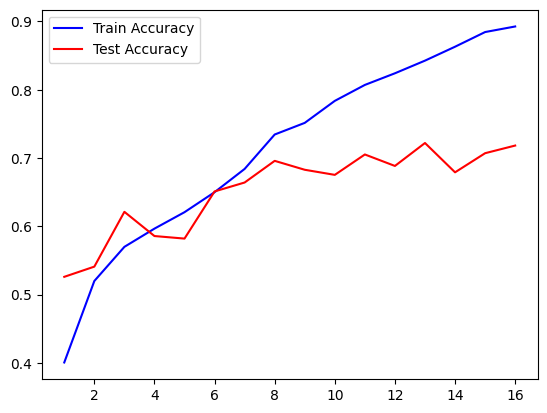

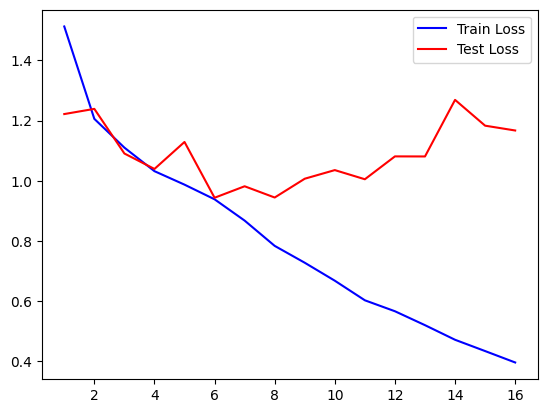

In [ ]:
# History of the epochs / iterations
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()

plt.show()

#**Grid Search Hypermarketers**

In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def create_model(c1 = 1, c2 = 1, h1 = 1, h2 = 1, regularizer_rate = 0.001, dropout_rate = 0.5):

  activation_function = 'relu'

  model = Sequential()
  model.add(Conv2D(c1, (3, 3), padding = 'same', input_shape = x_train.shape[1:], activation = activation_function))
  model.add(MaxPooling2D((2, 2), strides = (2, 2)))
  model.add(Conv2D(c2, (3, 3), padding = 'same', activation = activation_function))
  model.add(MaxPooling2D((2, 2), strides = (2, 2)))
  model.add(Flatten())
  model.add(Dense(h1, activation = activation_function, kernel_regularizer = regularizers.l2(regularizer_rate)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(h2, activation = activation_function, kernel_regularizer = regularizers.l2(regularizer_rate)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(y_train.shape[1], activation = 'softmax'))

  # Compile model
  model.compile(loss = 'categorical_crossentropy',  metrics = ['accuracy'], optimizer = 'adam')

  return model

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.callbacks import EarlyStopping

model = KerasClassifier(build_fn = create_model, c1 = 1, c2 = 1, h1 = 1, h2 = 1, regularizer_rate = 0.001, dropout_rate = 0.5, verbose = 0)

early_stopping = EarlyStopping(patience = 10, restore_best_weights = True)

c1 = [32, 64]
c2 = [64, 128]

h1 = [128, 256]
h2 = [64, 128]

param_grid = dict(c1 = c1, c2 = c2, h1 = h1, h2 = h2)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 10, callbacks = [early_stopping])

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
# Summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r' % (mean, stdev, param))

#**Conclusion**

Initially, the model is plagued with underfitting issue, causing both traing and testing dataset to perform poorly.
<br>
<br>After appylying data augmentation, reducing image size to (32, 32), increasing early stopping to 10, increasing the number of filters in the convolutional layers as well as the number of neurons in the hidden layers, the model's performance has improved slightly compared to the previous architecture. However, despite these improvements, the model is suffering from overfitting, indicating that further adjustments may be necessary to achieve better generalization.
<br>
<br>After applied dropout and regularizer L2 on all hidden layers, the model still overfitting, and the model had achieved the optimum loss at 1.9 and accuracy at 0.6.
<br>
<br><b><u>In summary:</u></b>
1. For convolutional layers, it is encouraged to start with a smaller number of filters and increase the number of filters in subsequent layers to capture increasingly complex features. Since 256 represents the intensity or brightness of the pixel, so the filters in covolutional layers will be using the multiplier of 256.

2. For hidden layers, it is encouraged to start with moderate number of neurons and decrease the number of neurons in subsequent hidden layers to reduce computational cost and prevent overfitting. Likewise, the number of neurons in hidden layers will be using the multiplier of 256 as well.

3. During a hyperparameter tuning experiment using grid search on a deep learning model with a large number of hyperparameters, the search failed to complete due to over processing time.